In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('auto-mpg.csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


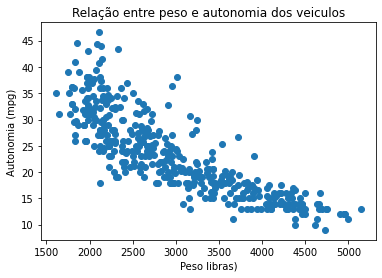

In [3]:
plt.scatter(dataset[['weight']], dataset[['mpg']])
plt.xlabel('Peso libras)')
plt.ylabel('Autonomia (mpg)')
plt.title('Relação entre peso e autonomia dos veiculos')
plt.show()

In [4]:
X = dataset[['weight']]
y = dataset[['mpg']]

In [5]:
X['weight'] = X['weight'] * 0.453592
y['mpg'] = y['mpg'] * 0.425144

In [6]:
X

,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [7]:
X.describe()

,weight
count,398.000000
mean,1347.360846
std,384.120654
min,731.643896
25%,1008.675210
50%,1271.645172
75%,1636.559936
max,2331.462880


In [8]:
y

,mpg
0,7.652592
1,6.377160
2,7.652592
3,6.802304
4,7.227448
...,...
393,11.478888
394,18.706336
395,13.604608
396,11.904032


### Normalização

In [9]:
escala = StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)

In [10]:
X_norm

array([[ 0.63086987],
       [ 0.85433297],
       [ 0.55047045],
       [ 0.54692342],
       [ 0.56584093],
       [ 1.62049216],
       [ 1.63586264],
       [ 1.58620417],
       [ 1.71980909],
       [ 1.03996105],
       [ 0.7006282 ],
       [ 0.75501604],
       [ 0.93473239],
       [ 0.1366499 ],
       [-0.70754402],
       [-0.16248324],
       [-0.23224156],
       [-0.45333997],
       [-0.99367137],
       [-1.34246298],
       [-0.35284069],
       [-0.63896804],
       [-0.70399699],
       [-0.87070755],
       [-0.38121696],
       [ 1.94445453],
       [ 1.66187422],
       [ 1.66896828],
       [ 2.08278883],
       [-0.99367137],
       [-0.83523722],
       [-0.87780162],
       [-1.0929883 ],
       [-0.39776978],
       [ 0.55401749],
       [ 0.4239596 ],
       [ 0.3920363 ],
       [ 0.37548348],
       [ 1.4644227 ],
       [ 1.76592053],
       [ 1.39939375],
       [ 1.33081778],
       [ 2.34645164],
       [ 2.09934165],
       [ 2.56518536],
       [-0

In [11]:
# treinando modelo
X_norm_train, X_norm_test, y_train, y_test =   train_test_split(X_norm,y, test_size=0.3)

In [25]:
#hidden_layer_sizes = numero de camada oculta
# max_iter = epoca
# tol = tolerancia para cada epoca
rna = MLPRegressor(hidden_layer_sizes=(100,250,150),
                  max_iter = 2000,
                  tol=0.0000001,
                  learning_rate_init=0.01,
                  solver='sgd',
                  activation='relu',
                  learning_rate='constant',
                  verbose=2)

In [26]:
rna.fit(X_norm_train,y_train)

Iteration 1, loss = 51.11040925
Iteration 2, loss = 25.64165680
Iteration 3, loss = 9.97844717
Iteration 4, loss = 2.23550302
Iteration 5, loss = 1.72633548
Iteration 6, loss = 1.67436906
Iteration 7, loss = 1.72106513
Iteration 8, loss = 1.61553957
Iteration 9, loss = 1.62667881
Iteration 10, loss = 1.67385492
Iteration 11, loss = 1.58264488
Iteration 12, loss = 1.57462429
Iteration 13, loss = 1.57850434
Iteration 14, loss = 1.58787956
Iteration 15, loss = 1.58769229
Iteration 16, loss = 1.63233434
Iteration 17, loss = 1.57498842
Iteration 18, loss = 1.57318197
Iteration 19, loss = 1.57974787
Iteration 20, loss = 1.56895554
Iteration 21, loss = 1.60768350
Iteration 22, loss = 1.60236920
Iteration 23, loss = 1.56519233
Iteration 24, loss = 1.56645118
Iteration 25, loss = 1.61906860
Iteration 26, loss = 1.59882118
Iteration 27, loss = 1.57033505
Iteration 28, loss = 1.60332565
Iteration 29, loss = 1.70672568
Iteration 30, loss = 1.55280446
Iteration 31, loss = 1.55458451
Iteration 32, l

MLPRegressor(hidden_layer_sizes=(100, 250, 150), learning_rate_init=0.01,
             max_iter=2000, solver='sgd', tol=1e-07, verbose=2)

In [14]:
reglinear = SGDRegressor(max_iter=2000,
                        tol=0.0000001,
                        eta0=0.1,
                        verbose=2)

In [15]:
reglinear.fit(X_norm_train,y_train)

-- Epoch 1
Norm: 2.60, NNZs: 1, Bias: 9.776049, T: 278, Avg. loss: 3.218751
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.67, NNZs: 1, Bias: 9.780338, T: 556, Avg. loss: 1.724250
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.81, NNZs: 1, Bias: 9.948916, T: 834, Avg. loss: 1.736145
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.74, NNZs: 1, Bias: 9.887614, T: 1112, Avg. loss: 1.734937
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.82, NNZs: 1, Bias: 9.979436, T: 1390, Avg. loss: 1.737832
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.91, NNZs: 1, Bias: 9.897300, T: 1668, Avg. loss: 1.715166
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.72, NNZs: 1, Bias: 9.850120, T: 1946, Avg. loss: 1.728585
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.90, NNZs: 1, Bias: 10.226021, T: 2224, Avg. loss: 1.708784
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.74, NNZs: 1, Bias: 10.150708, T: 2502, Avg. loss: 1.729905
Total training time: 0.00 se

SGDRegressor(eta0=0.1, max_iter=2000, tol=1e-07, verbose=2)

In [27]:
y_rna_previsao = rna.predict(X_norm_test)
y_rl_previsao = reglinear.predict(X_norm_test)

In [28]:
r2_rna = r2_score(y_test, y_rna_previsao)
r2_rl = r2_score(y_test,y_rl_previsao)

print(f'r2 da rede neural: {r2_rna}')
print(f'r2 da regressão: {r2_rl}')

r2 da rede neural: 0.713375272450222
r2 da regressão: 0.7001155183183188


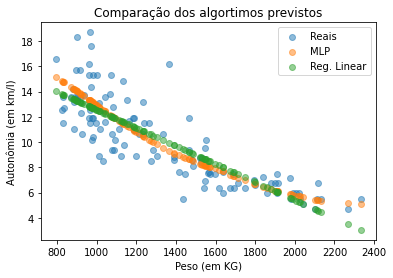

In [29]:
X_test = escala.inverse_transform(X_norm_test)

plt.scatter(X_test, y_test, label='Reais', alpha=0.5)
plt.scatter(X_test, y_rna_previsao, label = 'MLP', alpha=0.5)
plt.scatter(X_test, y_rl_previsao, label='Reg. Linear', alpha=0.5)
plt.xlabel('Peso (em KG)')
plt.ylabel('Autonômia (em km/l)')
plt.title('Comparação dos algortimos previstos')
plt.legend(loc=1)
plt.show()

In [31]:
# Previsão para um novo dado
# T = transposta
X_futuro = np.array([[1250]])
X_futuro_norm = escala.transform(X_futuro.T)

In [32]:
y_rna_prev_futuro = rna.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)

In [33]:
print(f'Dado futuro RNA: {y_rna_prev_futuro}')
print(f'Dado futuro Reg. Linear: {y_reglinear_prev_futuro}')

Dado futuro RNA: [10.31965824]
Dado futuro Reg. Linear: [10.78087186]


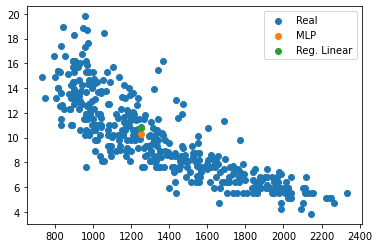

In [36]:
plt.scatter(X, y, label='Real')
plt.scatter(X_futuro, y_rna_prev_futuro, label='MLP')
plt.scatter(X_futuro, y_reglinear_prev_futuro, label='Reg. Linear')
plt.legend(loc=1)
plt.show()